In [17]:
import requests
from bs4 import BeautifulSoup

base_url = "https://www.airlinequality.com/airline-reviews/british-airways/"
max_pages = 100
reviews = []

for i in range(1, max_pages+1):
    response = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/")
    if response:
        content = response.content
        parsed_content = BeautifulSoup(content,"html.parser")
        articles = parsed_content.find_all("article",{"class":"comp_media-review-rated"})
        for article in articles:
            para = article.find("div",{"class":"text_content"})
            reviews.append(para.text)

In [72]:
import pandas as pd
dataset = pd.DataFrame()
dataset["reviews"] = reviews
dataset.head()

,reviews
0,✅ Trip Verified | We have sat on this plane fo...
1,Not Verified | British Airways stranding my w...
2,✅ Trip Verified | Although like many these d...
3,✅ Trip Verified | This flight was British Airw...
4,Not Verified | The worst airline I have ever f...


Machine Learning Model for Sentiment Analysis

In [21]:
import kagglehub

path = kagglehub.dataset_download("ajaysh/amazon-fine-food-reviews")
path

D:\DATA\myvenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 128M/128M [00:17<00:00, 7.72MB/s]


Extracting files...


'C:\\Users\\aaran\\.cache\\kagglehub\\datasets\\ajaysh\\amazon-fine-food-reviews\\versions\\1'

In [30]:
import sqlite3

conn = sqlite3.connect('database.sqlite')

query = "SELECT * FROM Reviews"
df = pd.read_sql_query(query, conn)

# Save data to a CSV file
df.to_csv('data.csv', index=False)

# Close the connection
conn.close()

df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [33]:
df['Text'].values[50]

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

<Axes: title={'center': 'Reviews using score'}, xlabel='Score'>

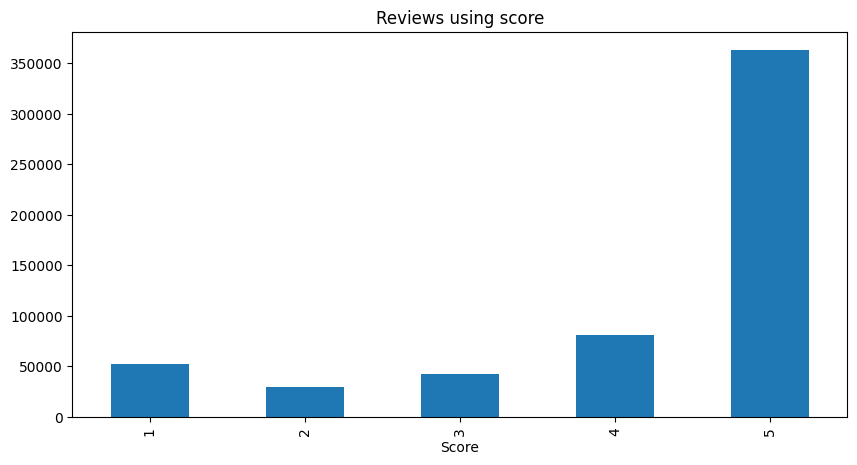

In [41]:
from matplotlib import pyplot as plt
df['Score'].value_counts().sort_index().plot(kind="bar",title="Reviews using score",figsize=(10,5))

In [46]:
df['sentiment'] = df['Score'].apply(lambda x : 1 if x > 3 else 0)

0         1
1         0
2         1
3         0
4         1
         ..
568449    1
568450    0
568451    1
568452    1
568453    1
Name: sentiment, Length: 568454, dtype: int64